In [2]:
import numpy as np

x = np.array(12)
print('scalar is rank %d' % x.ndim)

scalar is rank 0


In [4]:
x = np.array([1, 2, 3, 4, 5, 6])
print('vector is rank %d' % x.ndim)

vector is rank 1


In [6]:
x = np.array([[1, 4, 7],
              [2, 5, 8],
              [3, 6, 9]])
print('matrix is rank %d' % x.ndim)

matrix is rank 2


In [8]:
x = np.array([[[1, 4, 7],
               [2, 5, 8],
               [3, 6, 9]],
              [[10, 40, 70],
               [20, 50, 80],
               [30, 60, 90]],
              [[100, 400, 700],
               [200, 500, 800],
               [300, 600, 900]]])
print('this tensor is rank %d' % x.ndim)

this tensor is rank 3


In [16]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# dimensions of the tensor train_images, stored in .ndim attribute
print("train_images.ndim = ", train_images.ndim)

# shape of the tensor train_images
print("train_images.shape = ", train_images.shape)

# data type of the tensor 
print("train_images.dtype = ", train_images.dtype)

train_images.ndim =  3
train_images.shape =  (60000, 28, 28)
train_images.dtype =  uint8


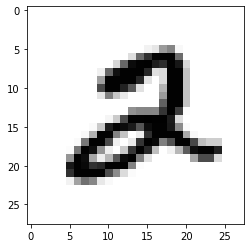

In [10]:
import matplotlib.pyplot as plt

# display one of the digits stored in the tensor 
digit = train_images[5]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [15]:
my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


In [1]:
# IMDB example from https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/3.5-classifying-movie-reviews.ipynb

# Classifying IMDB movie reviews
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=1000)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
c:\nik\woodbury\S21-CSMA213\github\.venv\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
c:\nik\woodbury\S21-CSMA213\github\.venv\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or sha

In [2]:
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

print(decoded_review)

? this film was just brilliant casting ? ? story direction ? really ? the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same ? ? as myself so i loved the fact there was a real ? with this film the ? ? throughout the film were great it was just brilliant so much that i ? the film as soon as it was released for ? and would recommend it to everyone to watch and the ? ? was amazing really ? at the end it was so sad and you know what they say if you ? at a film it must have been good and this definitely was also ? to the two little ? that played the ? of ? and paul they were just brilliant children are often left out of the ? ? i think because the stars that play them all ? up are such a big ? for the whole film but these children are amazing and should be ? for what they have done don't you think the whole story was so ? because it was true and was ? life after all that was ? with us all


In [3]:
import numpy as np

def vectorize_sequences(sequences, dimension=1000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results


In [4]:
# Our vectorized training data
x_train = vectorize_sequences(train_data)

# Our vectorized test data
x_test = vectorize_sequences(test_data)

# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [5]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(1000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [6]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [7]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [8]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
47/47 [==============================] - 3s 48ms/step - loss: 0.6276 - binary_accuracy: 0.6389 - val_loss: 0.4396 - val_binary_accuracy: 0.8120
Epoch 2/20
47/47 [==============================] - 0s 7ms/step - loss: 0.4052 - binary_accuracy: 0.8331 - val_loss: 0.3713 - val_binary_accuracy: 0.8310
Epoch 3/20
47/47 [==============================] - 0s 6ms/step - loss: 0.3474 - binary_accuracy: 0.8576 - val_loss: 0.3325 - val_binary_accuracy: 0.8570
Epoch 4/20
47/47 [==============================] - 0s 6ms/step - loss: 0.3195 - binary_accuracy: 0.8663 - val_loss: 0.3241 - val_binary_accuracy: 0.8630
Epoch 5/20
47/47 [==============================] - 0s 7ms/step - loss: 0.3040 - binary_accuracy: 0.8720 - val_loss: 0.3186 - val_binary_accuracy: 0.8640
Epoch 6/20
47/47 [==============================] - 0s 8ms/step - loss: 0.3035 - binary_accuracy: 0.8733 - val_loss: 0.3264 - val_binary_accuracy: 0.8590
Epoch 7/20
47/47 [==============================] - 0s 8ms/step - loss: 0.2

In [10]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

In [11]:
import matplotlib.pyplot as plt

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']

plt.figure(figsize=(8,6))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

NameError: name 'epochs' is not defined